<a href="https://colab.research.google.com/github/Andru-1987/77695_data_science_i_flex/blob/main/05_clase/dates_viz_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np

In [17]:
# ISO 86001
fechas = pd.date_range(start="2024-10-01",end='2025-10-10',freq='D')
fechas

DatetimeIndex(['2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04',
               '2024-10-05', '2024-10-06', '2024-10-07', '2024-10-08',
               '2024-10-09', '2024-10-10',
               ...
               '2025-10-01', '2025-10-02', '2025-10-03', '2025-10-04',
               '2025-10-05', '2025-10-06', '2025-10-07', '2025-10-08',
               '2025-10-09', '2025-10-10'],
              dtype='datetime64[ns]', length=375, freq='D')

In [18]:
np.random.seed(42)

In [19]:
datos = {
    'temperatura': np.random.normal(25, 5, len(fechas)) + 10 * np.sin(2 * np.pi * np.arange(len(fechas)) / 365),
    'humedad': np.random.normal(60, 15, len(fechas)),
    'ventas': np.random.poisson(50, len(fechas)) * (1 + 0.3 * np.sin(2 * np.pi * np.arange(len(fechas)) / 30))
}


In [20]:
df = pd.DataFrame(datos, index = fechas)

In [22]:
df.index.name = 'fecha'

In [23]:
df

,temperatura,humedad,ventas
fecha,,,
2024-10-01,27.483571,48.489787,45.000000
2024-10-02,24.480812,73.084810,58.430543
2024-10-03,28.582659,62.750130,57.223071
2024-10-04,33.131346,92.847044,62.345786
2024-10-05,24.517257,47.875526,67.261890
...,...,...,...
2025-10-06,25.982199,49.113843,56.691343
2025-10-07,28.521008,62.801501,75.822494
2025-10-08,33.457798,48.669256,65.874792


In [24]:
df_mensual_promedio = df.resample('ME').mean()
df_mensual_promedio

,temperatura,humedad,ventas
fecha,,,
2024-10-31,26.515935,59.600312,51.152238
2024-11-30,31.392386,62.814176,51.133254
2024-12-31,34.854857,56.076871,51.891481
2025-01-31,34.458194,60.535265,50.532879
2025-02-28,31.354627,55.824211,47.762455
2025-03-31,29.040437,56.805077,50.897044
2025-04-30,23.290630,60.932909,49.109912
2025-05-31,18.041388,61.913915,50.786924
2025-06-30,15.039681,57.963683,50.923807


In [26]:
df_semanal_sample  =  df['ventas'].resample('W').sum()
df_semanal_sample.head()

,ventas
fecha,
2024-10-06,355.771285
2024-10-13,435.507196
2024-10-20,354.947370
2024-10-27,281.281703
2024-11-03,307.791773


In [27]:
df_trimestral  =  df.resample('QE').agg({
    'temperatura': ['mean','min','max'],
    'humedad': 'mean',
    'ventas': 'sum'
})

df_trimestral

temperatura                          humedad       ventas
                  mean        min        max       mean          sum
fecha                                                               
2024-12-31   30.915936  17.652814  42.333783  59.461065  4728.352900
2025-03-31   31.626523  20.972397  46.623450  57.784761  4481.676358
2025-06-30   18.782334  -1.002474  39.858470  60.288232  4575.406214
2025-09-30   18.948985   5.426496  31.975670  60.011473  4530.061334
2025-12-31   27.896037  21.822975  37.309000  50.228912   658.596709

In [29]:
df['temperatura_14d'] = df['temperatura'].rolling(window=14).median()

df.head(20)

,temperatura,humedad,ventas,temperatura_14d
fecha,,,,
2024-10-01,27.483571,48.489787,45.000000,NaN
2024-10-02,24.480812,73.084810,58.430543,NaN
2024-10-03,28.582659,62.750130,57.223071,NaN
2024-10-04,33.131346,92.847044,62.345786,NaN
2024-10-05,24.517257,47.875526,67.261890,NaN
2024-10-06,24.688963,47.404172,65.509996,NaN
2024-10-07,33.927081,51.009110,64.265848,NaN
2024-10-08,30.039254,28.141564,59.724402,NaN
2024-10-09,24.025416,52.113675,51.934263,NaN


# Viz|

In [33]:
df_mensual_promedio.sort_values(by='ventas',ascending=False)

,temperatura,humedad,ventas
fecha,,,
2025-10-31,27.896037,50.228912,65.859671
2024-12-31,34.854857,56.076871,51.891481
2024-10-31,26.515935,59.600312,51.152238
2024-11-30,31.392386,62.814176,51.133254
2025-06-30,15.039681,57.963683,50.923807
2025-03-31,29.040437,56.805077,50.897044
2025-05-31,18.041388,61.913915,50.786924
2025-01-31,34.458194,60.535265,50.532879
2025-08-31,19.250110,59.440000,49.877137


In [35]:
import matplotlib.pyplot as plt

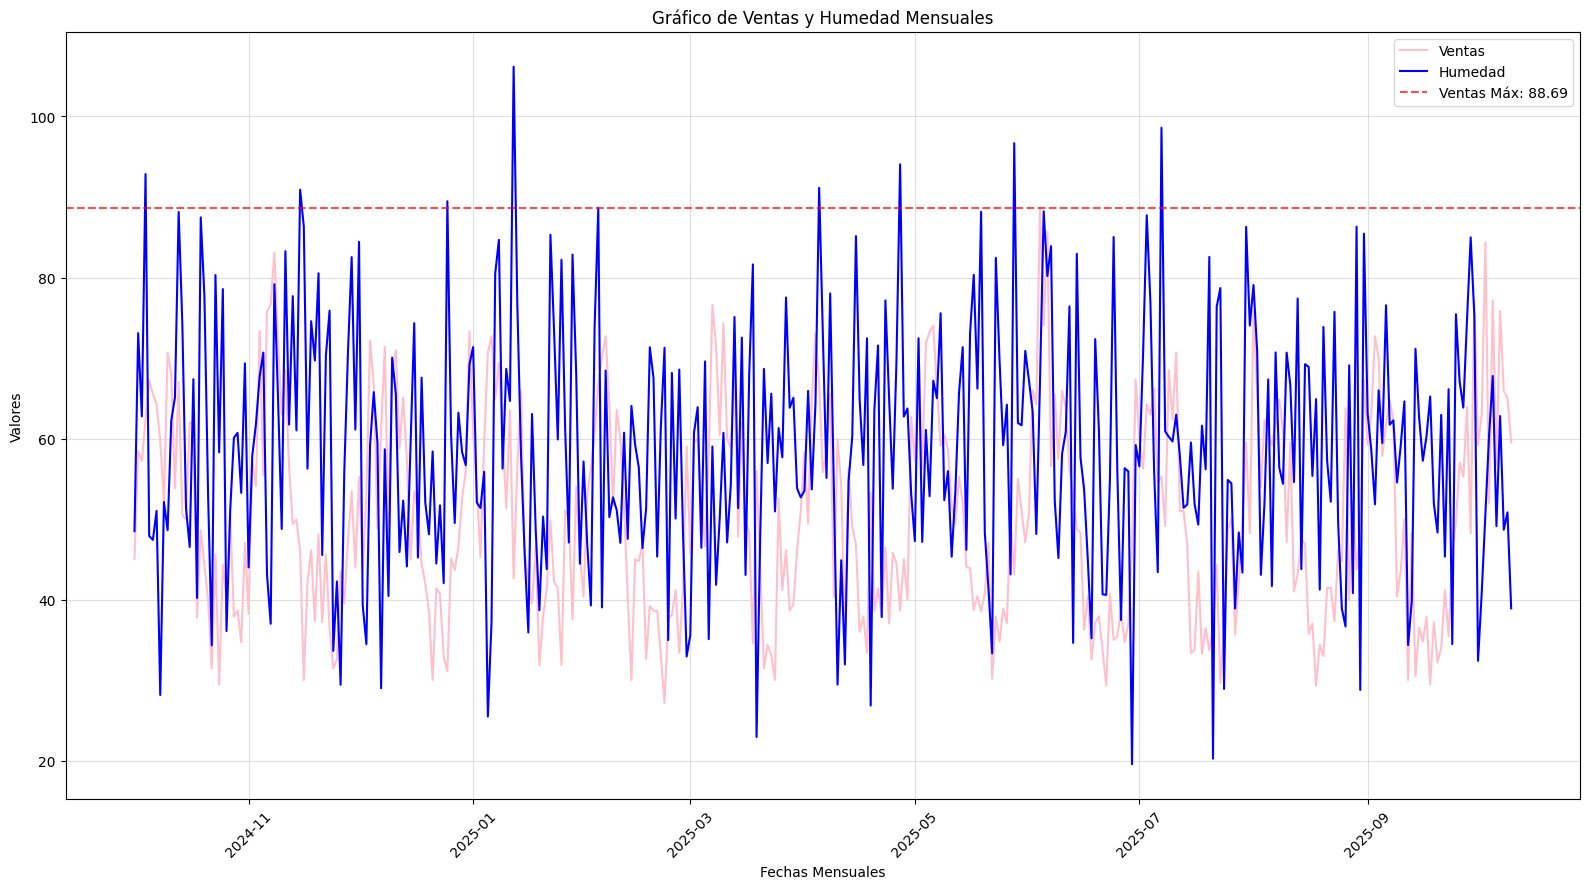

In [50]:
plt.figure(figsize=(16, 9))

# Graficar cada serie por separado con etiquetas distintas
plt.plot(df.index, df['ventas'], color='pink', linestyle='-', label='Ventas')
plt.plot(df.index, df['humedad'], color='blue', linestyle='-', label='Humedad')

# Línea horizontal en el valor máximo de ventas
max_ventas = df['ventas'].max()
plt.axhline(y=max_ventas, color='red', linestyle='--', alpha=0.7,
            label=f'Ventas Máx: {max_ventas:.2f}')

plt.title('Gráfico de Ventas y Humedad Mensuales')
plt.xlabel('Fechas Mensuales')
plt.ylabel('Valores')

# Rotar los xticks 45 grados para mejor legibilidad
plt.xticks(rotation=45)

plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.legend()
plt.show()

# Los Subplots

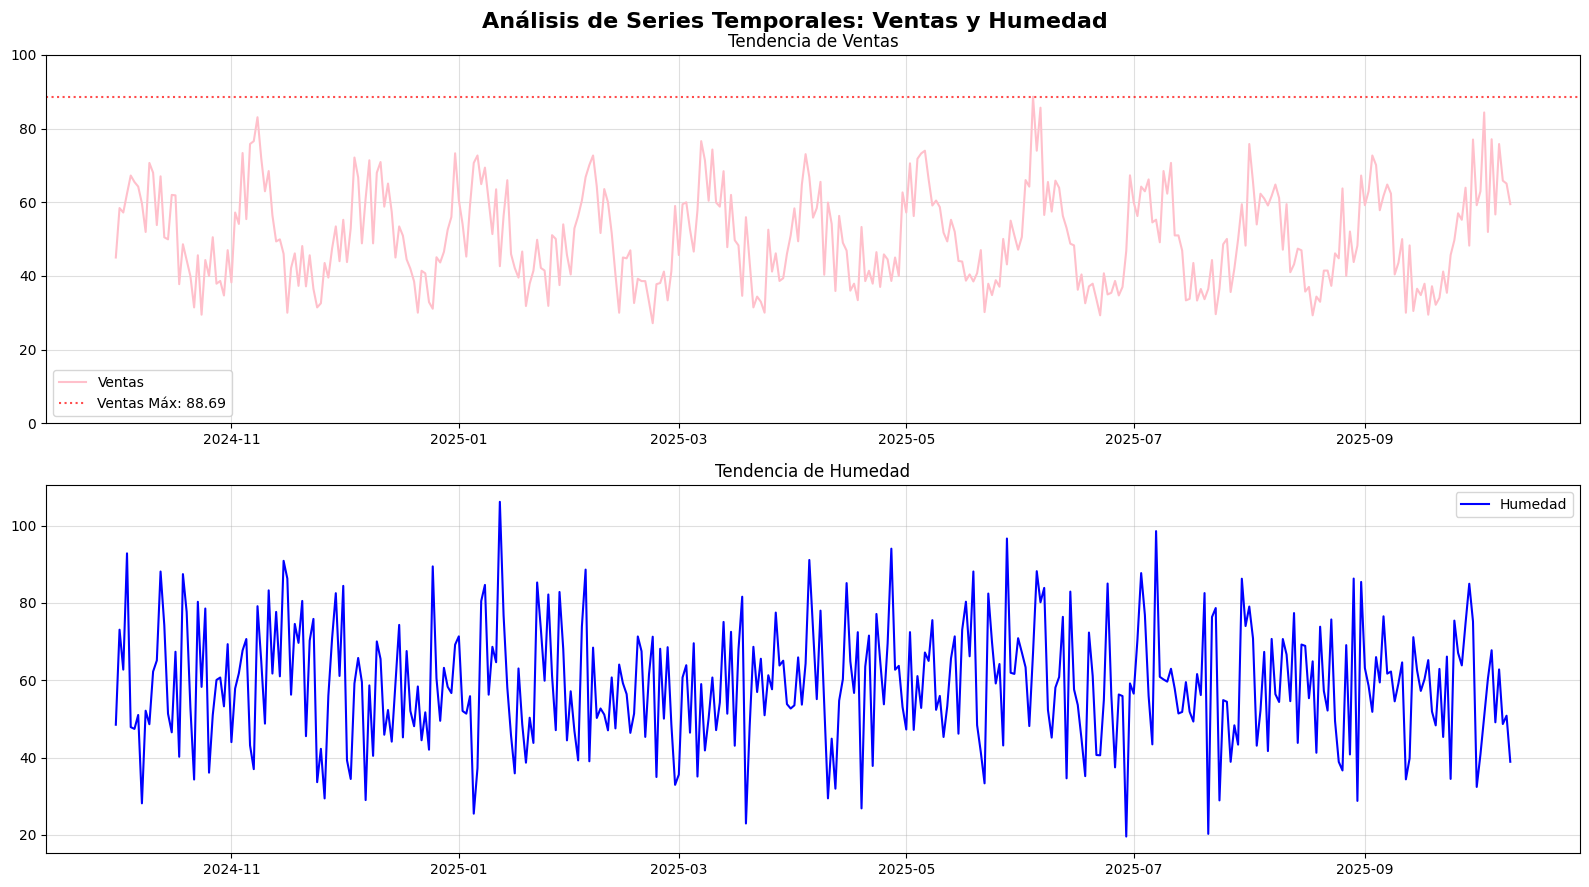

In [68]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,9))

# Título general para toda la figura
fig.suptitle('Análisis de Series Temporales: Ventas y Humedad', fontsize=16, fontweight='bold')

fig.patch.set_alpha(0.1)

ax[0].plot(df.index, df['ventas'], color='pink', linestyle='-', label='Ventas')
ax[0].grid(True, alpha=0.4)

max_ventas = df['ventas'].max()
ax[0].axhline(y=max_ventas, color='red', linestyle=':', alpha=0.7,
            label=f'Ventas Máx: {max_ventas:.2f}')
ax[0].set_ylim(0,100)
ax[0].legend()
ax[0].set_title('Tendencia de Ventas')


ax[1].plot(df.index, df['humedad'], color='blue', linestyle='-', label='Humedad')
ax[1].set_title('Tendencia de Humedad')
ax[1].grid(True, alpha=0.4)  # Agregar grid también al segundo subplot
ax[1].legend()

# Ajustar el layout para que el título general no se superponga
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Ajusta este valor según necesites
plt.show()

- Seaborn  -> excelente para seguir despues de matplot
- Plotly -> interactividad
- Bokeh -> interactividad y eficiencia para otros formatos
- Altair
- Dash

In [69]:
import seaborn as sns

In [79]:
# Preparar los datos en formato largo (tidy) para Seaborn
df_melted = df.reset_index().melt( id_vars = ['fecha'],
                                  value_vars=['ventas', 'humedad'],
                                  var_name='variable',
                                  value_name='valor')

df_melted

,fecha,variable,valor
0,2024-10-01,ventas,45.000000
1,2024-10-02,ventas,58.430543
2,2024-10-03,ventas,57.223071
3,2024-10-04,ventas,62.345786
4,2024-10-05,ventas,67.261890
...,...,...,...
745,2025-10-06,humedad,49.113843
746,2025-10-07,humedad,62.801501
747,2025-10-08,humedad,48.669256
748,2025-10-09,humedad,50.827233


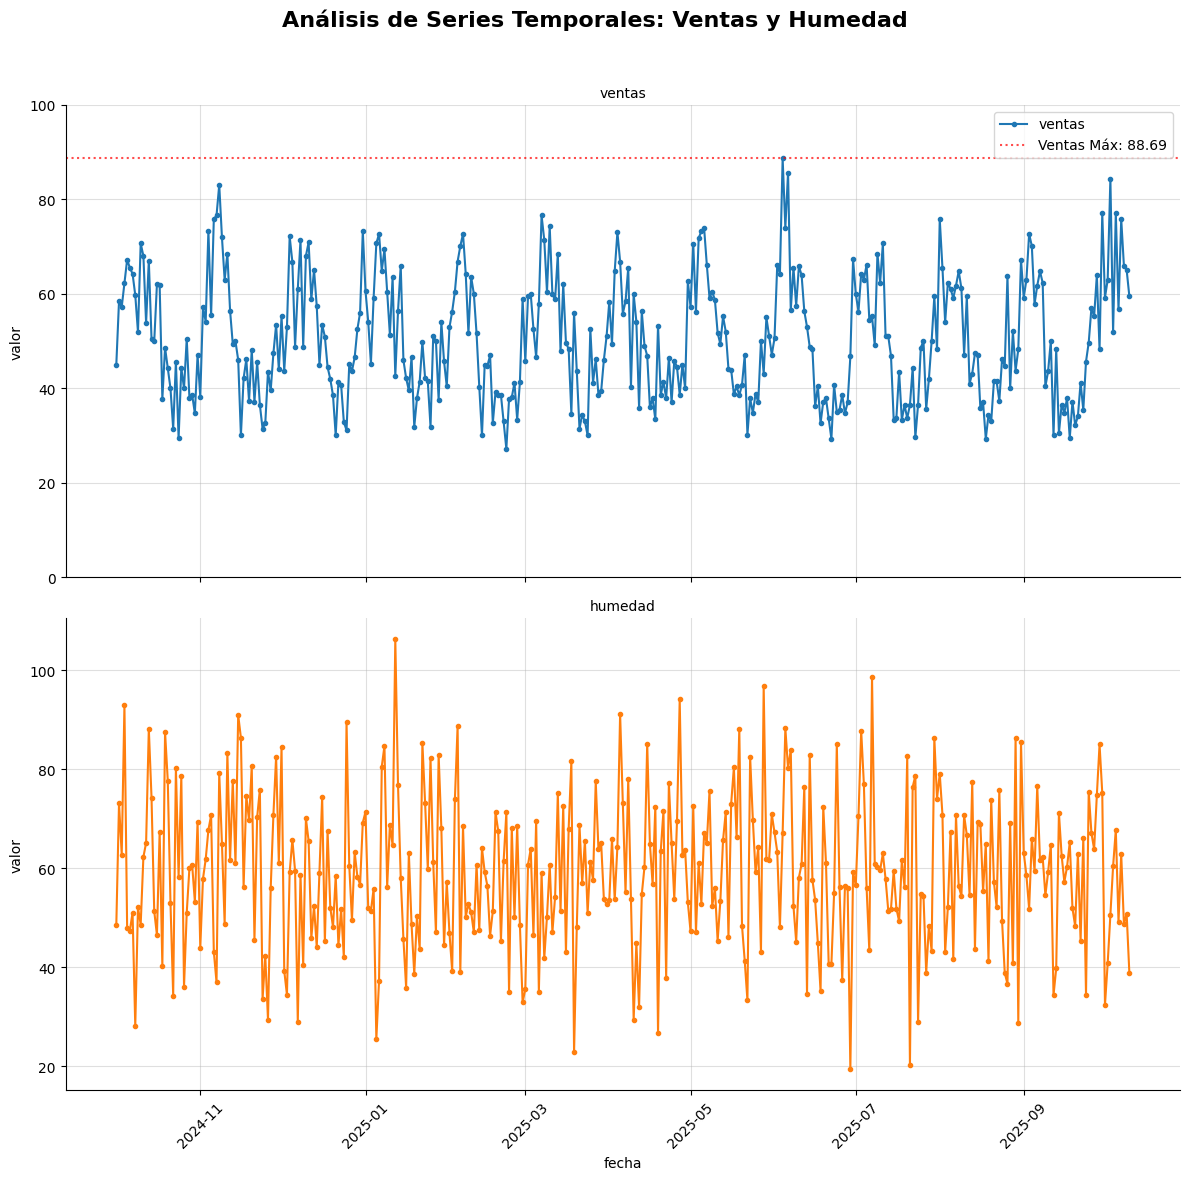

In [81]:
# Crear el FacetGrid
g = sns.FacetGrid(df_melted, col='variable', hue='variable',
                  col_wrap=1, height=6, aspect=2, sharey=False)

# Mapear los gráficos de línea
g.map(plt.plot, 'fecha', 'valor', marker='o', markersize=3)

# Configurar títulos y estilos
g.set_titles('{col_name}')
g.fig.suptitle('Análisis de Series Temporales: Ventas y Humedad',
               fontsize=16, fontweight='bold', y=0.98)

# Personalizar cada subgráfico
for i, ax in enumerate(g.axes.flat):
    if i == 0:  # Primer subplot (Ventas)
        max_ventas = df['ventas'].max()
        ax.axhline(y=max_ventas, color='red', linestyle=':', alpha=0.7,
                  label=f'Ventas Máx: {max_ventas:.2f}')
        ax.set_ylim(0, 100)
        ax.legend()
    ax.grid(True, alpha=0.4)
    ax.tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

In [83]:
! pip install bokeh

In [84]:
import bokeh

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, Legend, Range1d
from bokeh.layouts import column
from bokeh.io import output_notebook, output_file
from bokeh.palettes import Category10


In [85]:
# Para mostrar en Jupyter Notebook
output_notebook()


In [86]:
# Preparar los datos
df_temp = df.reset_index()
date_col_name = df_temp.columns[0]
dates = df_temp[date_col_name]

# Crear ColumnDataSource para cada serie
source_ventas = ColumnDataSource(data={
    'x': dates,
    'y': df['ventas'],
    'fecha': dates.astype(str),
    'valor': df['ventas']
})

source_humedad = ColumnDataSource(data={
    'x': dates,
    'y': df['humedad'],
    'fecha': dates.astype(str),
    'valor': df['humedad']
})



In [92]:
# Crear las figuras
WIDTH = 1600
HEIGHT = 900

p1 = figure(
    title="Tendencia de Ventas",
    x_axis_label='Fechas Mensuales',
    y_axis_label='Ventas',
    width=WIDTH,
    height=HEIGHT,
    x_axis_type='datetime' if pd.api.types.is_datetime64_any_dtype(dates) else 'auto',
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

p2 = figure(
    title="Tendencia de Humedad",
    x_axis_label='Fechas Mensuales',
    y_axis_label='Humedad',
    width=WIDTH,
    height=HEIGHT,
    x_axis_type='datetime' if pd.api.types.is_datetime64_any_dtype(dates) else 'auto',
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

In [93]:
# Configurar estilo de las figuras
for p in [p1, p2]:
    p.title.text_font_size = '14pt'
    p.title.text_font_style = 'bold'
    p.grid.grid_line_alpha = 0.4
    p.xaxis.major_label_orientation = 45

# Gráfico de Ventas
ventas_line = p1.line(
    'x', 'y',
    source=source_ventas,
    line_color='pink',
    line_width=3,
    legend_label='Ventas'
)

ventas_circle = p1.circle(
    'x', 'y',
    source=source_ventas,
    size=6,
    color='pink',
    alpha=0.7
)

# Línea de máximo en ventas
max_ventas = df['ventas'].max()
max_line = p1.line(
    dates, [max_ventas] * len(dates),
    line_color='red',
    line_dash='dashed',
    line_width=2,
    alpha=0.7,
    legend_label=f'Ventas Máx: {max_ventas:.2f}'
)

# Gráfico de Humedad
humedad_line = p2.line(
    'x', 'y',
    source=source_humedad,
    line_color='blue',
    line_width=3,
    legend_label='Humedad'
)

humedad_circle = p2.circle(
    'x', 'y',
    source=source_humedad,
    size=6,
    color='blue',
    alpha=0.7
)

# Configurar límites del eje Y para ventas
p1.y_range = Range1d(0, 100)

# Añadir herramientas de hover
hover_ventas = HoverTool(
    tooltips=[
        ('Fecha', '@fecha'),
        ('Ventas', '@valor{0.2f}'),
    ],
    renderers=[ventas_line]
)

hover_humedad = HoverTool(
    tooltips=[
        ('Fecha', '@fecha'),
        ('Humedad', '@valor{0.2f}'),
    ],
    renderers=[humedad_line]
)

p1.add_tools(hover_ventas)
p2.add_tools(hover_humedad)

# Configurar leyendas
p1.legend.location = 'top_left'
p1.legend.click_policy = 'hide'
p2.legend.location = 'top_left'
p2.legend.click_policy = 'hide'

# Crear layout
layout = column(p1, p2)

# Mostrar el gráfico
show(layout)

In [94]:
import plotly.express as px

In [97]:
fig = px.line(df, y="ventas")
fig.show()

In [99]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Crear figura con subplots
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Tendencia de Ventas', 'Tendencia de Humedad'),
    vertical_spacing=0.12
)

# Configurar título general
fig.update_layout(
    title_text='Análisis de Series Temporales: Ventas y Humedad',
    title_font_size=16,
    title_font_weight='bold',
    title_x=0.5,  # Centrar título
    height=HEIGHT,
    width=WIDTH,
    showlegend=True
)

# Añadir gráfico de ventas
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['ventas'],
        mode='lines',
        name='Ventas',
        line=dict(color='pink', width=2),
        legendgroup="ventas"
    ),
    row=1, col=1
)

# Añadir línea horizontal para máximo de ventas
max_ventas = df['ventas'].max()
fig.add_hline(
    y=max_ventas,
    line_dash="dot",
    line_color="red",
    opacity=0.7,
    annotation_text=f"Ventas Máx: {max_ventas:.2f}",
    annotation_position="top right",
    row=1, col=1
)

# Añadir gráfico de humedad
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['humedad'],
        mode='lines',
        name='Humedad',
        line=dict(color='blue', width=2),
        legendgroup="humedad"
    ),
    row=2, col=1
)

# Configurar ejes y grids
fig.update_yaxes(range=[0, 100], row=1, col=1)  # Límites para ventas
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey', row=1, col=1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey', row=1, col=1)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey', row=2, col=1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey', row=2, col=1)

# Mostrar figura
fig.show()